In [1]:
import pandas as pd

df = pd.read_csv('bioactivity_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.00,intermediate
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.00,intermediate
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.00,active
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.00,inactive
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.00,active
...,...,...,...,...
2715,CHEMBL4104297,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...,500.00,intermediate
2716,CHEMBL4080062,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...,500.00,intermediate
2717,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,8730.00,inactive
2718,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,0.96,active


In [2]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [3]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [4]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL68920,300.00,intermediate,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...
1,CHEMBL69960,400.00,intermediate,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
2,CHEMBL67057,100.00,active,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
3,CHEMBL65848,5000.00,inactive,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...
4,CHEMBL69629,100.00,active,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...
...,...,...,...,...
2715,CHEMBL4104297,500.00,intermediate,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...
2716,CHEMBL4080062,500.00,intermediate,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...
2717,CHEMBL5270270,8730.00,inactive,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC
2718,CHEMBL5282641,0.96,active,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...


In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [6]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,559.630,4.82482,3.0,7.0
3,470.533,3.31052,3.0,6.0
4,525.972,3.20392,4.0,7.0
...,...,...,...,...
2715,424.382,5.27540,2.0,5.0
2716,439.393,5.18550,2.0,5.0
2717,343.358,3.27700,1.0,6.0
2718,547.414,5.54280,1.0,7.0


In [8]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,300.00,intermediate,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,400.00,intermediate,482.903,3.61432,3.0,6.0
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,100.00,active,559.630,4.82482,3.0,7.0
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,5000.00,inactive,470.533,3.31052,3.0,6.0
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,100.00,active,525.972,3.20392,4.0,7.0
...,...,...,...,...,...,...,...,...
2715,CHEMBL4104297,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...,500.00,intermediate,424.382,5.27540,2.0,5.0
2716,CHEMBL4080062,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...,500.00,intermediate,439.393,5.18550,2.0,5.0
2717,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,8730.00,inactive,343.358,3.27700,1.0,6.0
2718,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,0.96,active,547.414,5.54280,1.0,7.0


In [9]:
df_combined.standard_value.describe()

count    2.720000e+03
mean     8.760730e+03
std      4.446738e+04
min      6.000000e-02
25%      5.000000e+01
50%      2.500000e+02
75%      3.530000e+03
max      1.600000e+06
Name: standard_value, dtype: float64

In [10]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
         i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,300.00
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,482.903,3.61432,3.0,6.0,400.00
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,100.00
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,470.533,3.31052,3.0,6.0,5000.00
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,100.00
...,...,...,...,...,...,...,...,...
2715,CHEMBL4104297,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...,intermediate,424.382,5.27540,2.0,5.0,500.00
2716,CHEMBL4080062,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...,intermediate,439.393,5.18550,2.0,5.0,500.00
2717,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,inactive,343.358,3.27700,1.0,6.0,8730.00
2718,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,active,547.414,5.54280,1.0,7.0,0.96


In [11]:
df_norm.standard_value_norm.describe()

count    2.720000e+03
mean     8.760730e+03
std      4.446738e+04
min      6.000000e-02
25%      5.000000e+01
50%      2.500000e+02
75%      3.530000e+03
max      1.600000e+06
Name: standard_value_norm, dtype: float64

In [12]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x
    
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,383.814,4.45034,3.0,4.0,6.522879
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,intermediate,482.903,3.61432,3.0,6.0,6.397940
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,470.533,3.31052,3.0,6.0,5.301030
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
...,...,...,...,...,...,...,...,...
2715,CHEMBL4104297,Nc1nccc(Oc2ccc3c(C(=O)Nc4cccc(C(F)(F)F)c4)cccc...,intermediate,424.382,5.27540,2.0,5.0,6.301030
2716,CHEMBL4080062,O=C(Nc1cccc(C(F)(F)F)c1)c1cccc2cc(Oc3cc(CO)ncn...,intermediate,439.393,5.18550,2.0,5.0,6.301030
2717,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,inactive,343.358,3.27700,1.0,6.0,5.058986
2718,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,active,547.414,5.54280,1.0,7.0,9.017729


In [13]:
df_final.pIC50.describe()

count    2720.000000
mean        6.418256
std         1.214609
min         2.795880
25%         5.452225
50%         6.602060
75%         7.301030
max        10.221849
Name: pIC50, dtype: float64

In [14]:
df_final.to_csv('HER2_bioactivity_data_3class_pIC50.csv')

In [15]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL67057,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,559.630,4.82482,3.0,7.0,7.000000
3,CHEMBL65848,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,inactive,470.533,3.31052,3.0,6.0,5.301030
4,CHEMBL69629,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncn...,active,525.972,3.20392,4.0,7.0,7.000000
5,CHEMBL66570,CCN1CCN(C(=O)c2cc(C)c(/C=C3\C(=O)Nc4ncnc(Nc5cc...,active,509.973,3.91962,3.0,6.0,7.000000
6,CHEMBL305194,Cc1cc(C(=O)O)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F...,inactive,413.796,3.84012,4.0,5.0,5.301030
...,...,...,...,...,...,...,...,...
2713,CHEMBL1095259,N=C1N=C(NCCS(=O)(=O)O)/C(=C/C(O)CNC(=O)c2cc(Br...,inactive,528.183,-0.07183,7.0,6.0,4.421017
2714,CHEMBL4575427,N=C1N=C(NCCS(=O)(=O)O)/C(=C/C(O)CNC(=O)c2cc(Br...,inactive,449.287,-0.83433,7.0,6.0,4.421017
2717,CHEMBL5270270,COc1cc2ncnc(NCCOc3ccccc3F)c2cc1OC,inactive,343.358,3.27700,1.0,6.0,5.058986
2718,CHEMBL5282641,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,active,547.414,5.54280,1.0,7.0,9.017729


In [16]:
df_2class.to_csv('acetylcholinesterase_bioactivity_data_2class_pIC50.csv')

In [17]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

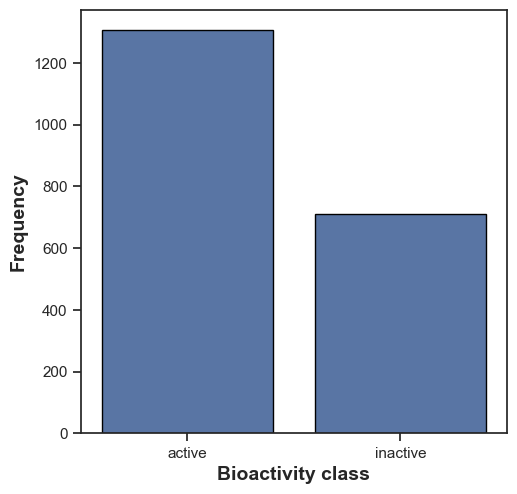

In [18]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_bioactivity_class.pdf')

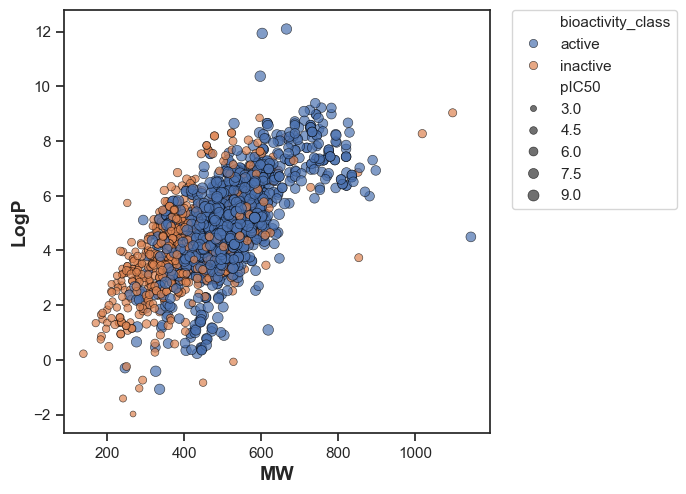

In [19]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('Plots/plot_MW_vs_LogP.pdf')

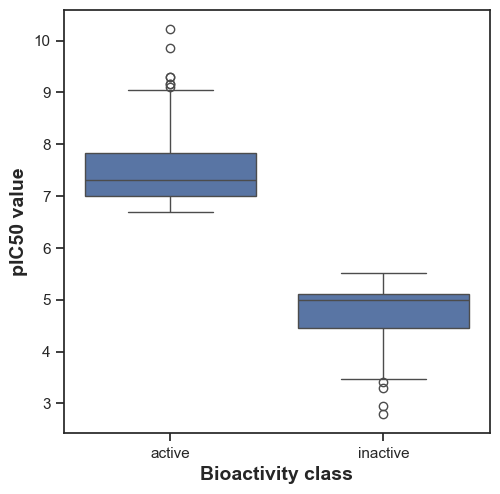

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_ic50.pdf')

In [22]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [23]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,929277.0,1.076882e-302,0.05,Different distribution (reject H0)


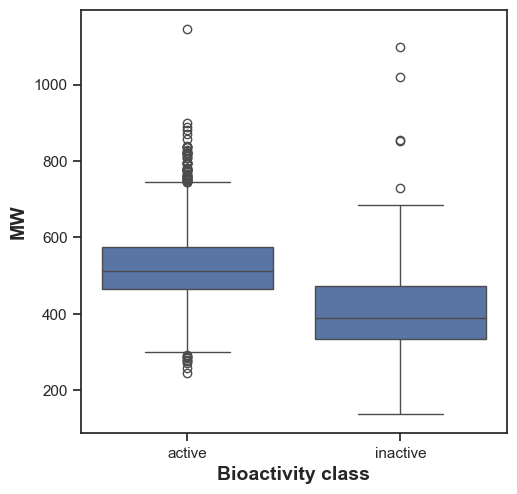

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_MW.pdf')
     

In [25]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,746759.5,1.015444e-112,0.05,Different distribution (reject H0)


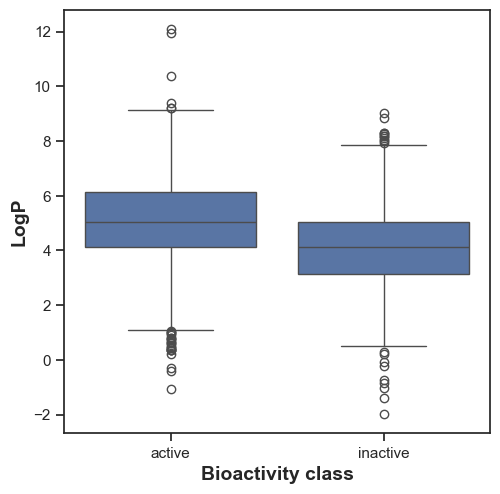

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_LogP.pdf')

In [27]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,630263.0,4.781391e-40,0.05,Different distribution (reject H0)


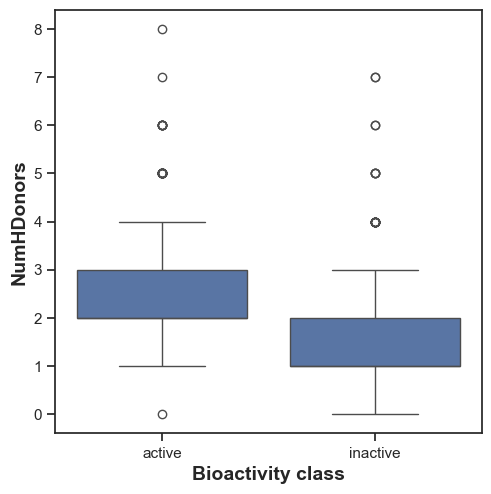

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_NumHDonors.pdf')

In [29]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,636264.0,1.211840e-48,0.05,Different distribution (reject H0)


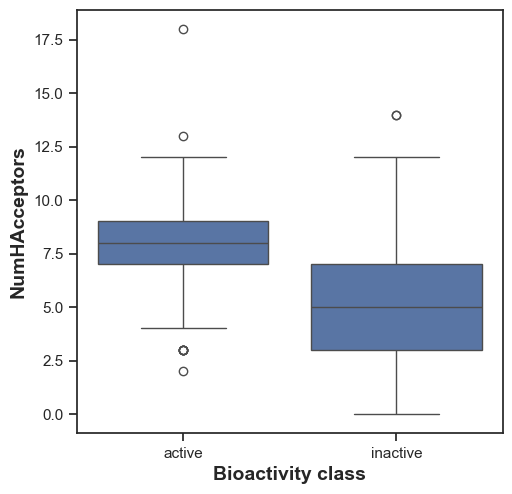

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('Plots/plot_NumHAcceptors.pdf')

In [31]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,734837.5,1.170459e-105,0.05,Different distribution (reject H0)
